In [2]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv("./Data/vin.csv")
df.columns = ["index","alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline","target"]
df = df.set_index("index")
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
index,,,,,,,,,,,,,,
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Vin amer
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Vin amer
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Vin amer
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Vin amer
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Vin amer


# VARIABLES QUALITATIVES

## Barplot 

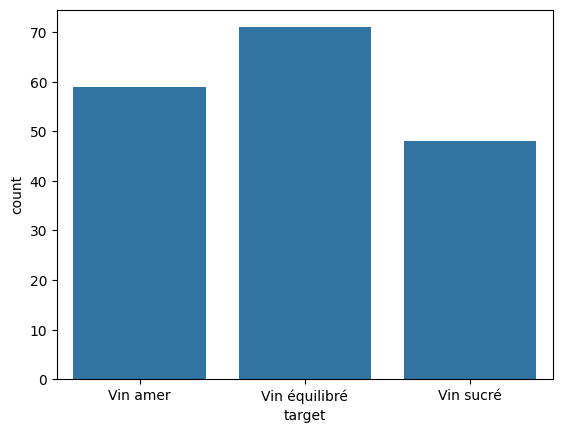

In [18]:
sns.countplot(x='target', data=df)
plt.show()

# VARIABLES QUANTITATIVES

## Courbe de distribution

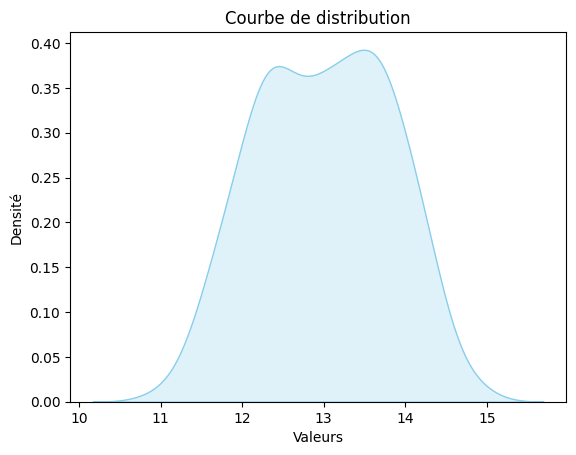

In [30]:
sns.kdeplot(df['alcohol'], fill=True, color="skyblue")
#
plt.title('Courbe de distribution')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.show()

## Boxplot

<Axes: xlabel='target', ylabel='alcohol'>

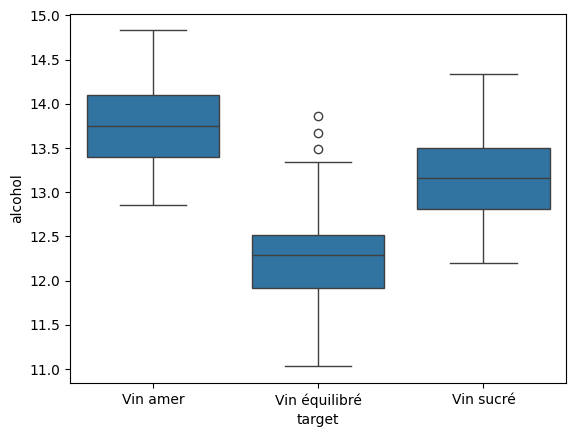

In [9]:
sns.boxplot(x='target', y='alcohol', data=df)

In [11]:
# pd.crosstab(df['target'], df['alcohol']).plot(kind='bar', stacked=True)

## Détection des valeurs manquantes

In [14]:
print(df['alcohol'].isna().sum())

0


## Détection des valeurs aberrantes

In [25]:
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['alcohol'] < Q1 - 1.5 * IQR) | (df['alcohol'] > Q3 + 1.5 * IQR)]
outliers

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
index,,,,,,,,,,,,,,


## Logarithme pour réduire l'asymétrie

In [27]:
df_standard = df
df_standard['log_alcohol'] = np.log1p(df_standard['alcohol'])
df_standard['log_alcohol']

index
0      2.723267
1      2.653242
2      2.650421
3      2.732418
4      2.656055
         ...   
173    2.688528
174    2.667228
175    2.658159
176    2.651127
177    2.716680
Name: alcohol, Length: 178, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
df_standard['scaled_alcohol'] = StandardScaler().fit_transform(df_standard[['alcohol']])
df_standard['scaled_alcohol']

index
0      1.518613
1      0.246290
2      0.196879
3      1.691550
4      0.295700
         ...   
173    0.876275
174    0.493343
175    0.332758
176    0.209232
177    1.395086
Name: scaled_alcohol, Length: 178, dtype: float64

# TRAITEMENT DE DONNEES

## Analyse descriptive d'un dataframe

In [2]:
# Example DataFrame
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 28, 32, 37],
    'Salary': [50000, 60000, 75000, 80000, 55000, 58000, 62000],
    'Department': ['HR', 'IT', 'Finance', 'HR', 'Finance', 'IT', 'HR']
})

### 1. Preview the DataFrame

In [4]:
# 1. Preview the DataFrame
print("### DataFrame Preview:")
print(df.head())  # Displays the first few rows

### DataFrame Preview:
   Age  Salary Department
0   25   50000         HR
1   30   60000         IT
2   35   75000    Finance
3   40   80000         HR
4   28   55000    Finance


### 2. DataFrame Information

In [5]:
# 2. DataFrame Information
print("\n### DataFrame Information:")
print(df.info())  # Column names, data types, non-null counts


### DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         7 non-null      int64 
 1   Salary      7 non-null      int64 
 2   Department  7 non-null      object
dtypes: int64(2), object(1)
memory usage: 296.0+ bytes
None


In [6]:
# 3. Summary Statistics for Numeric Columns
print("\n### Summary Statistics (Numeric Columns):")
print(df.describe())  # Mean, std, min, max, etc.


### Summary Statistics (Numeric Columns):
             Age        Salary
count   7.000000      7.000000
mean   32.428571  62857.142857
std     5.255383  10807.845475
min    25.000000  50000.000000
25%    29.000000  56500.000000
50%    32.000000  60000.000000
75%    36.000000  68500.000000
max    40.000000  80000.000000


In [7]:
# 4. Summary Statistics for Categorical Columns
print("\n### Frequency Count (Categorical Columns):")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nFrequency of '{col}':")
    print(df[col].value_counts())


### Frequency Count (Categorical Columns):

Frequency of 'Department':
Department
HR         3
IT         2
Finance    2
Name: count, dtype: int64


In [8]:
# 5. Missing Values
print("\n### Missing Values:")
print(df.isna().sum())  # Count of missing values in each column


### Missing Values:
Age           0
Salary        0
Department    0
dtype: int64


In [11]:
# 6. Correlation Matrix
print("\n### Correlation Matrix:")
print(df.drop('Department',axis=1).corr())  # Correlation between numeric columns


### Correlation Matrix:
             Age    Salary
Age     1.000000  0.869812
Salary  0.869812  1.000000


In [19]:
corr = df.drop("target",axis=1).corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).highlight_null(color='#f1f1f1').format(precision=2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
malic_acid,0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ash,0.21,0.16,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
alcalinity_of_ash,-0.31,0.29,0.44,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
magnesium,0.27,-0.05,0.29,-0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_phenols,0.29,-0.34,0.13,-0.32,0.21,nan,nan,nan,nan,nan,nan,nan,nan
flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,nan,nan,nan,nan,nan,nan,nan
nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,nan,nan,nan,nan,nan,nan
proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,nan,nan,nan,nan,nan
color_intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,nan,nan,nan,nan


In [26]:
df.iloc[:, :df.shape[1]//2]
df.iloc[:, df.shape[1]//2:]

,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
index,,,,,,,
0,0.28,2.29,5.64,1.04,3.92,1065.0,Vin amer
1,0.26,1.28,4.38,1.05,3.40,1050.0,Vin amer
2,0.30,2.81,5.68,1.03,3.17,1185.0,Vin amer
3,0.24,2.18,7.80,0.86,3.45,1480.0,Vin amer
4,0.39,1.82,4.32,1.04,2.93,735.0,Vin amer
...,...,...,...,...,...,...,...
173,0.52,1.06,7.70,0.64,1.74,740.0,Vin sucré
174,0.43,1.41,7.30,0.70,1.56,750.0,Vin sucré
175,0.43,1.35,10.20,0.59,1.56,835.0,Vin sucré


In [28]:
len(df)

178

In [29]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [30]:
df["target"].value_counts()

target
Vin équilibré    71
Vin amer         59
Vin sucré        48
Name: count, dtype: int64

In [10]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib


X = df.drop("target", axis=1)
y = df["target"]

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
model_choice = "Logistic Regression"

# Pipeline de traitement et choix du modèle
if model_choice == "Logistic Regression":
    model = Pipeline([("scaler", StandardScaler()), ("classifier", LogisticRegression())])
elif model_choice == "Random Forest":
    model = Pipeline([("classifier", RandomForestClassifier(random_state=42))])
elif model_choice == "Support Vector Classifier (SVC)":
    model = Pipeline([("scaler", StandardScaler()), ("classifier", SVC())])

# Entraîner le modèle
model.fit(X_train, y_train)

# Effectuer des prédictions
#y_pred = model.predict(X_test)

# Évaluer les performances
#accuracy = accuracy_score(y_test, y_pred)
#report = classification_report(y_test, y_pred, target_names=["Vin équilibré", "Vin amer", "Vin sucré"])

#model, accuracy, report, X_test, y_test


In [6]:

# Interface Streamlit
def main():
    st.title("Pipeline Machine Learning - Analyse des vins")
    st.write("Ce pipeline permet d'entraîner un modèle de classification pour prédire le type de vin en fonction des caractéristiques.")

    # Chargement des données
    df = load_data()
    st.write("Aperçu des données :")
    st.dataframe(df.head())

    # Choix de l'algorithme
    st.subheader("1. Choisissez un modèle de classification")
    model_choice = st.selectbox(
        "Modèles disponibles :",
        ["Logistic Regression", "Random Forest", "Support Vector Classifier (SVC)"]
    )

    # Entraîner le modèle
    if st.button("Entraîner le modèle"):
        model, accuracy, report, X_test, y_test = train_model(df, model_choice)

        st.write(f"### Précision du modèle : {accuracy:.2f}")
        st.write("Rapport de classification :")
        st.text(report)

        # Sauvegarder le modèle
        if st.button("Sauvegarder le modèle"):
            joblib.dump(model, "model.joblib")
            st.write("Modèle sauvegardé sous le nom `model.joblib`")

        # Prédictions sur de nouvelles données
        st.subheader("2. Effectuer des prédictions")
        uploaded_file = st.file_uploader("Charger un fichier CSV avec de nouvelles données", type=["csv"])
        if uploaded_file is not None:
            new_data = pd.read_csv(uploaded_file)
            predictions = model.predict(new_data)
            st.write("### Prédictions :")
            st.write(predictions)
main()


2024-11-24 21:55:38.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 21:55:38.736 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 21:55:38.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 21:55:38.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 21:55:38.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 21:55:38.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 21:55:38.745 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 21:55:38.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar